In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
from sklearn.utils.class_weight import compute_class_weight
warnings.filterwarnings('ignore')
plt.style.use('ggplot')


In [2]:
data = pd.read_csv("datasets/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot:xlabel='Outcome', ylabel='count'>

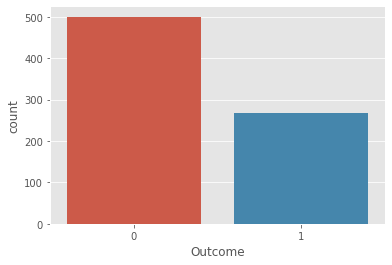

In [3]:
sns.countplot(x = 'Outcome', data = data)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


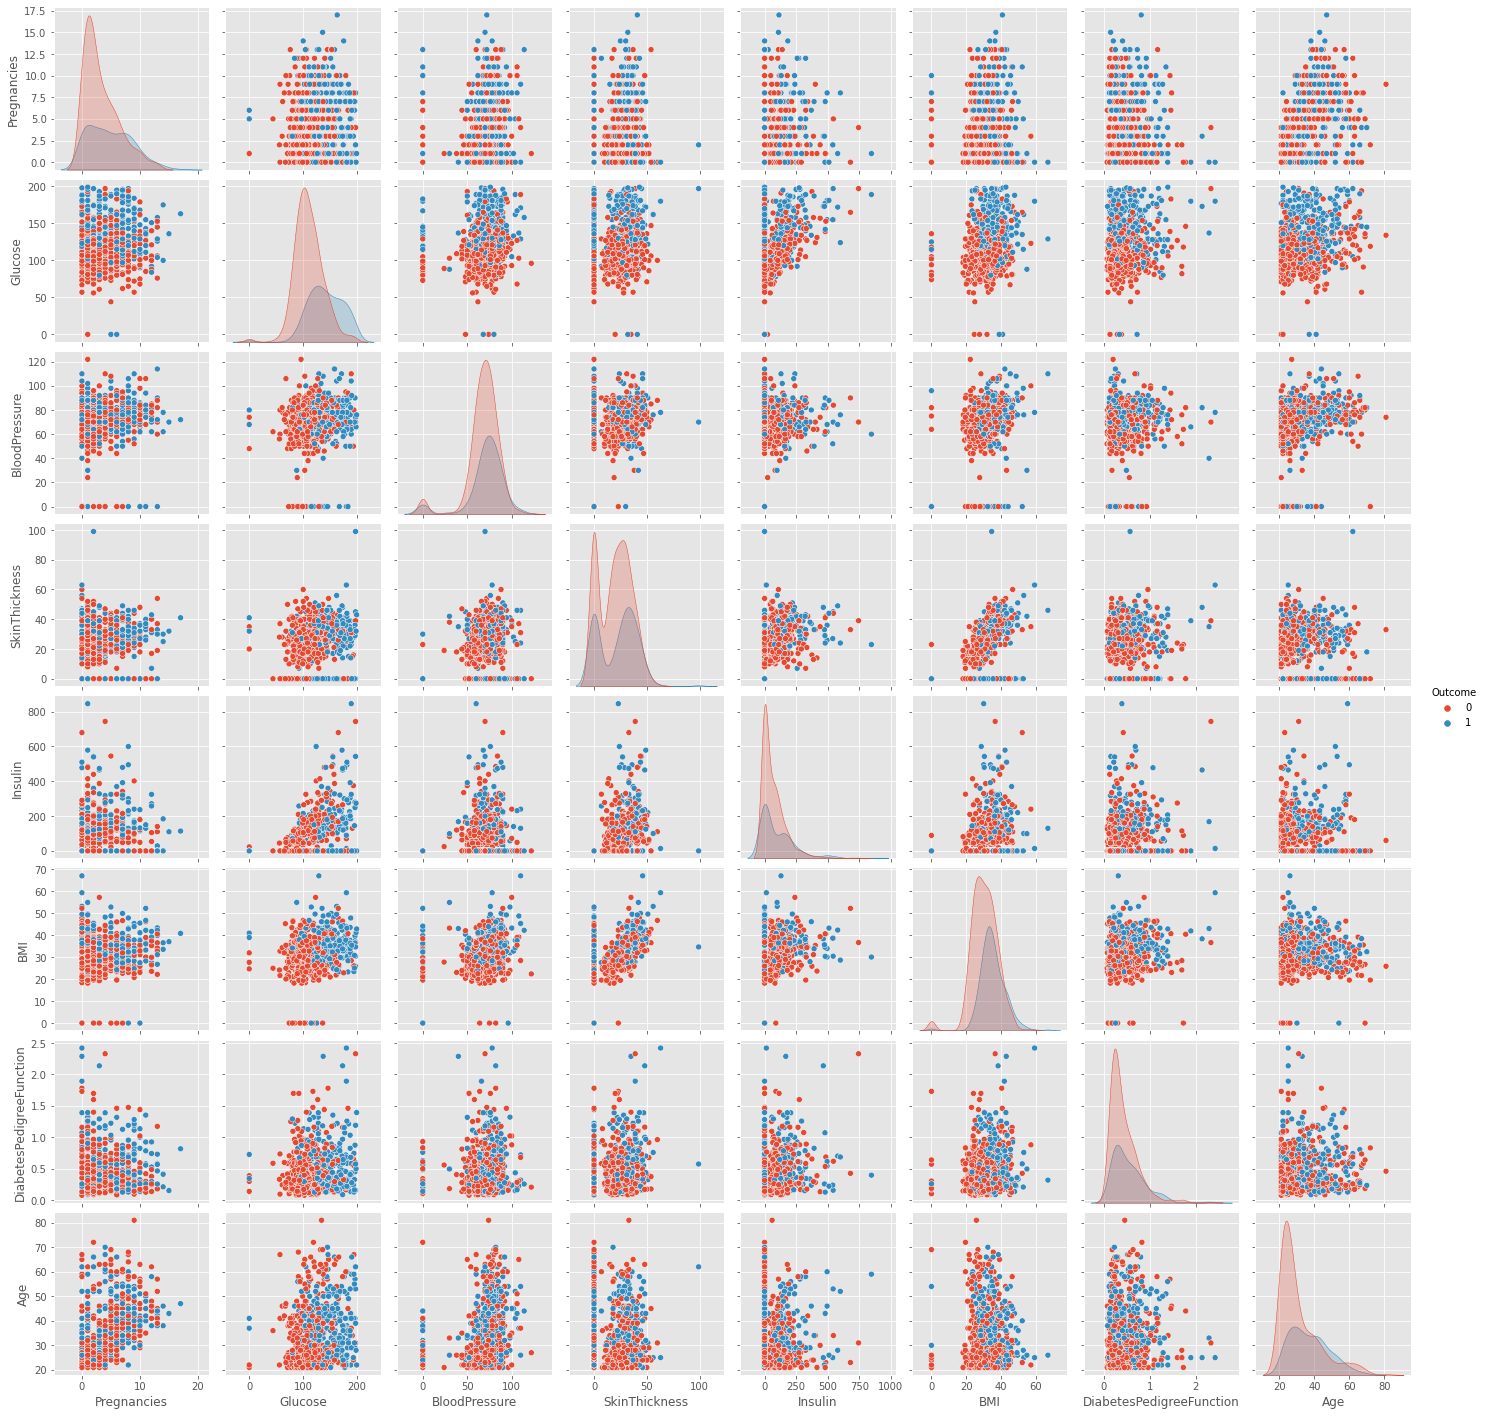

In [6]:
sns.pairplot(data, hue = 'Outcome', vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


<AxesSubplot:>

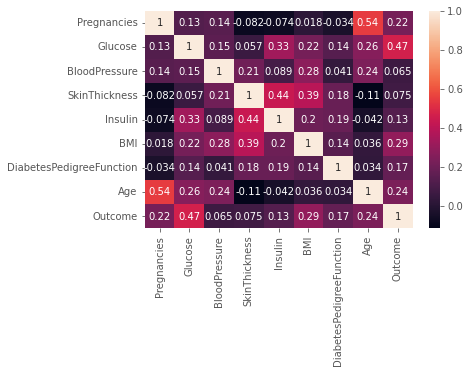

In [8]:
sns.heatmap(data.corr(), annot = True)

In [7]:
X, y = data.drop('Outcome',axis=1), data['Outcome']
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=77)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
class_weights = compute_class_weight(class_weight='balanced',  
                                     classes=np.unique(y_train), 
                                     y=y_train)
model_class_weights = {}
for e , weight in enumerate(class_weights):
    model_class_weights[e] = weight

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.utils.class_weight import compute_class_weight
from scikeras.wrappers import KerasClassifier
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

In [11]:
def report_results(model,y_pred,history):
    print(f"Accuracy/Score: {accuracy_score(y_test, y_pred)}")
    print(f"Precision = {precision_score(y_test, y_pred)}\n")
    #print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}")
    print("Classification Report:\n")
    print(classification_report(y_test, y_pred, digits=4))
    print("Confusion Matrix:\n")
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    roc(model,y_pred)
    print("Acuuracy & Loss:\n")
    accuracy_loss(history)
    plt.show()
    print("ROC:\n")

In [12]:
def roc(model,y_pred):
    logit_roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"Ann_model(area = {round(logit_roc_auc,2)})")
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

In [13]:
def accuracy_loss(history):
    #  "Accuracy Plot"
    fig, ax= plt.subplots(1,2,figsize=(13,5))
    ax[0].set_title("Model Accuracy")
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_ylabel('accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].legend(['train', 'validation'], loc='upper left')

    # "Loss Plot"
    ax[1].set_title('Model Loss')
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_ylabel('loss')
    ax[1].set_xlabel('epoch')
    ax[1].legend(['train', 'validation'], loc='upper left')
    plt.show()

In [14]:
def create_model():
	# create model
    # Init the model
    clf_model = tf.keras.models.Sequential()
    # First layer inputs
    clf_model.add(tf.keras.Input(shape=(X_train.shape[1],)))
    # hidden layers number 1
    clf_model.add(tf.keras.layers.BatchNormalization())
    clf_model.add(tf.keras.layers.Dense(128, activation='relu'))
    clf_model.add(tf.keras.layers.Dropout(0.2))          
    # hidden layers number 2
    clf_model.add(tf.keras.layers.BatchNormalization())  
    clf_model.add(tf.keras.layers.Dense(64 , activation='relu'))
    clf_model.add(tf.keras.layers.Dropout(0.2))
    # hidden layers number 3
    clf_model.add(tf.keras.layers.BatchNormalization())
    clf_model.add(tf.keras.layers.Dense(16 , activation='relu'))
    # Last layer
    clf_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # print summary to undertstand your neural network flow
    clf_model.summary()
    
    return clf_model

In [16]:
seed = 7
tf.random.set_seed(seed)
# create model
model = KerasClassifier(model=create_model, 
                        loss="binary_crossentropy", 
                        optimizer="Adam", 
                        metrics="accuracy",
                        verbose=1)
# define the grid search parameters
learn_rate = [0.001]
batch_size = [20]
epochs = [50]
# 10, 50, 0.001

In [17]:
#param_grid = dict(batch_size=batch_size, epochs=epochs)
param_grid = dict(optimizer__learning_rate=learn_rate, batch_size=batch_size, epochs= epochs)


In [18]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=3)
grid_result = grid.fit(X, y, class_weight=model_class_weights)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 8)                32        
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 128)               1152      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [19]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.743490 using {'batch_size': 20, 'epochs': 50, 'optimizer__learning_rate': 0.001}


In [21]:
Optimizer = tf.keras.optimizers.Adam(learning_rate=grid_result.best_params_['optimizer__learning_rate'])
model = create_model()
model.compile(Optimizer, 
              loss='binary_crossentropy', 
              metrics=["accuracy"])
epochs_hist = model.fit(X_train,
                        y_train,
                        validation_data=(X_test , y_test),
                        batch_size=grid_result.best_params_['batch_size'], 
                        epochs=grid_result.best_params_['epochs'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_15 (Bat  (None, 8)                32        
 chNormalization)                                                
                                                                 
 dense_20 (Dense)            (None, 128)               1152      
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 batch_normalization_16 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dropout_11 (Dropout)        (None, 64)               

model.get_params().keys() \
dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size' 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs', 'class_weight'])

5/5 [==============================] - 0s 2ms/step
Accuracy/Score: 0.7467532467532467
Precision = 0.6086956521739131

Classification Report:

              precision    recall  f1-score   support

           0     0.8056    0.8286    0.8169       105
           1     0.6087    0.5714    0.5895        49

    accuracy                         0.7468       154
   macro avg     0.7071    0.7000    0.7032       154
weighted avg     0.7429    0.7468    0.7445       154

Confusion Matrix:

5/5 [==============================] - 0s 3ms/step


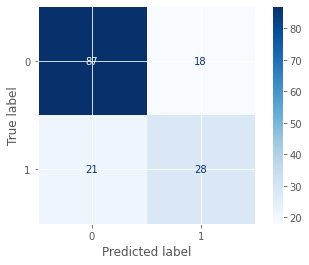

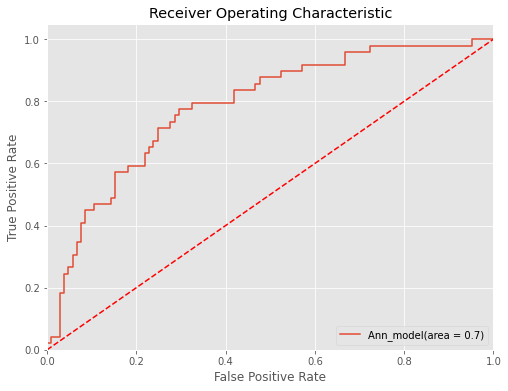

Acuuracy & Loss:



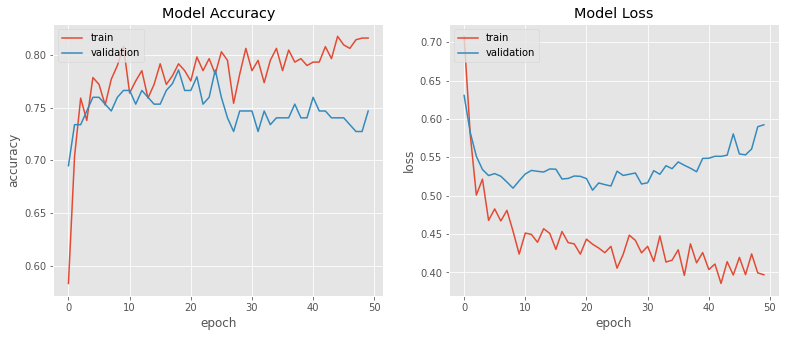

ROC:



In [22]:
y_pred = model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)
report_results(model ,y_pred, epochs_hist)